In [140]:
import pandas as pd
import numpy as np
import seaborn as sns



import matplotlib.pyplot as plt
%matplotlib inline

import random
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [141]:
data = pd.read_csv('Mobile_App_Success_Regression_065474da917f57f7133a4a1645c65be2.csv')

In [142]:
#prints first 5 entries of the dataframe
data.head(10) 

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device
5,Safeway Online Shopping,FOOD_AND_DRINK,3.82532239,2559.0,"100,000+",23M,0,Everyone,29-Mar-19,5.0 and up,7.6.0
6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267267704,421918.0,"10,000,000+",Varies with device,0,Teen,28-Mar-19,Varies with device,Varies with device
7,Talabat: Food Delivery,FOOD_AND_DRINK,4.495084763,142618.0,"5,000,000+",Varies with device,0,Everyone,31-Mar-19,Varies with device,Varies with device
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811764717,85.0,"10,000+",4.1M,0,Everyone,10-Feb-19,4.3 and up,2.4
9,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.545353413,67514.0,"5,000,000+",Varies with device,0,Everyone,7-Mar-19,Varies with device,Varies with device


In [143]:
data.shape

(25920, 11)

In [144]:
#result shows there are 25920 entries in the dataframe , it also lists the columns present in the dataset
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         25920 non-null  object 
 1   Category         25920 non-null  object 
 2   Rating           25920 non-null  object 
 3   Reviews          25919 non-null  float64
 4   Installs         25920 non-null  object 
 5   Size             25920 non-null  object 
 6   Price            25920 non-null  object 
 7   Content Rating   25920 non-null  object 
 8   Last Updated     25920 non-null  object 
 9   Minimum Version  25920 non-null  object 
 10  Latest Version   25919 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.2+ MB


In [145]:
data.isnull().any()

App Name           False
Category           False
Rating             False
Reviews             True
Installs           False
Size               False
Price              False
Content Rating     False
Last Updated       False
Minimum Version    False
Latest Version      True
dtype: bool

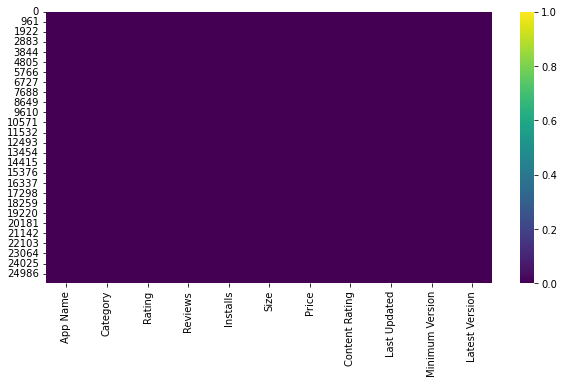

In [146]:
plt.figure(figsize=(10, 5))   
sns.heatmap(data.isnull(), cmap='viridis');   

In [147]:
data.isnull().sum() # shows the number of missing value in each column respectively

App Name           0
Category           0
Rating             0
Reviews            1
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     1
dtype: int64

In [148]:
data.dropna()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
25915,KG Newsroom,NEWS_AND_MAGAZINES,4.5,8.0,50+,9.6M,0,Everyone,28-Mar-19,4.1 and up,1.1.15
25916,Dedi App 19,GAME_SIMULATION,3.521126747,71.0,"10,000+",6.5M,0,Everyone,22-Jan-19,4.4 and up,1.0.2274
25917,Dedi App 17,GAME_SIMULATION,3.994588852,924.0,"100,000+",7.9M,0,Everyone,17-Feb-17,4.0.3 and up,1.1.2043
25918,Right Angle Triangle Solver,TOOLS,4.25,1796.0,"100,000+",6.8M,0,Everyone,15-Dec-18,4.1 and up,2.0.5


In [149]:
data.dropna(inplace=True)

In [150]:
# shows the number of missing value in each column respectively
data.isnull().sum() 

App Name           0
Category           0
Rating             0
Reviews            0
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     0
dtype: int64

In [151]:
data.shape

(25918, 11)

In [152]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25918 entries, 0 to 25919
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         25918 non-null  object 
 1   Category         25918 non-null  object 
 2   Rating           25918 non-null  object 
 3   Reviews          25918 non-null  float64
 4   Installs         25918 non-null  object 
 5   Size             25918 non-null  object 
 6   Price            25918 non-null  object 
 7   Content Rating   25918 non-null  object 
 8   Last Updated     25918 non-null  object 
 9   Minimum Version  25918 non-null  object 
 10  Latest Version   25918 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.4+ MB


In [153]:
data.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device


In [154]:
data["Size"] = data["Size"].str.replace("Varies with device","0")
data["Size"] = data["Size"].str.replace(",",".")

In [155]:
n = 'hello'
v = n[:-1]
print(v)

hell


In [156]:
v = '1'

In [157]:
#function to convert MB and KB in bytes
def edit(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data["Size"] = data["Size"].map(edit) #update the Size column with these new values

In [158]:
data.Size.dtype

dtype('float64')

Text(0, 0.5, 'Frequency')

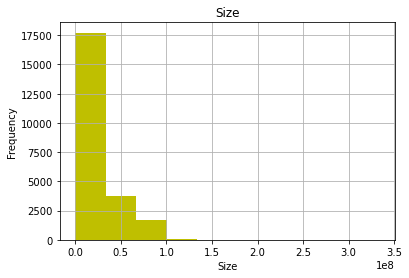

In [159]:
data.hist(column='Size', color='y') 
plt.xlabel('Size')
plt.ylabel('Frequency')

In [160]:
data['Reviews'].unique()

array([ 305034., 1207922.,    1967., ...,   11214.,   14039.,    1796.])

In [161]:
data.duplicated().sum()

1

In [162]:
data.drop_duplicates(inplace=True)

In [163]:
data.Installs.value_counts() 

100,000+          5342
1,000,000+        4284
10,000+           3612
500,000+          2294
50,000+           2120
1,000+            1846
10,000,000+       1695
5,000,000+        1293
5,000+            1166
100+               794
500+               568
50,000,000+        303
100,000,000+       242
10+                125
50+                125
500,000,000+        33
5+                  24
1,000,000,000+      24
1+                  20
5,000,000,000+       3
0+                   2
6                    1
11976                1
Name: Installs, dtype: int64

In [164]:
data.Installs=data.Installs.apply(lambda x: x.strip('+'))  #remove symbol '+'
data.Installs=data.Installs.apply(lambda x: x.replace(',','')) #remove symbol ','

In [165]:
data['Installs'] = data['Installs'].astype(float)

In [166]:
data.Installs.value_counts()

1.000000e+05    5342
1.000000e+06    4284
1.000000e+04    3612
5.000000e+05    2294
5.000000e+04    2120
1.000000e+03    1846
1.000000e+07    1695
5.000000e+06    1293
5.000000e+03    1166
1.000000e+02     794
5.000000e+02     568
5.000000e+07     303
1.000000e+08     242
1.000000e+01     125
5.000000e+01     125
5.000000e+08      33
5.000000e+00      24
1.000000e+09      24
1.000000e+00      20
5.000000e+09       3
0.000000e+00       2
6.000000e+00       1
1.197600e+04       1
Name: Installs, dtype: int64

In [167]:
data["Reviews"] = data["Reviews"].astype("int64")

In [168]:
data.Reviews

0         305034
1        1207922
2           1967
3         389154
4           2291
          ...   
25915          8
25916         71
25917        924
25918       1796
25919       3372
Name: Reviews, Length: 25917, dtype: int64

In [169]:
data['Rating'].dtype

dtype('O')

In [170]:
data["Rating"] = data["Rating"].str.replace('GAME_STRATEGY',"0")

In [171]:
data['Rating'] = data["Rating"].str.replace('NEWS_AND_MAGAZINES',"0")

In [172]:
data['Rating'] = data['Rating'].astype(float)

In [173]:
print("Range: ", data.Rating.min(),"-",data.Rating.max()) 

Range:  0.0 - 5.0


In [174]:
data['Rating'].dtype

dtype('float64')

Text(0, 0.5, 'Frequency')

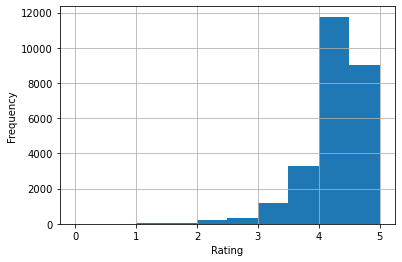

In [175]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [176]:
data.Price=data.Price.apply(lambda x: x.strip('$'))  #removing the symbol '$'

In [177]:
data['Price'] = data["Price"].str.replace('Varies with device',"0")

In [178]:
data.Price=data.Price.apply(lambda x: x.strip('M'))

In [179]:
data.Price.unique()

array(['0', '5.99 ', '2.99 ', '1.99 ', '6.99 ', '4.99 ', '3.99 ', '9.99 ',
       '0.99 ', '3.49 ', '13.99 ', '7.99 ', '4.95 ', '5.49 ', '39.99 ',
       '8.99 ', '1.49 ', '7.49 ', '399.99 ', '2.49 ', '10.99 ', '2.20 ',
       '1.25 ', '11.99 ', '14.99 ', '74.99 ', '99.99 ', '9.00 ', '24.99 ',
       '10.00 ', '4.89 ', '4.49 ', '15.99 ', '3.22 ', '3.55 ', '12.99 ',
       '23.99 ', '3.75 ', '6.49 ', '19.99 ', '3.95 ', '32.99 ', '1.26 ',
       '21.00 ', '9.79 ', '79.99 ', '6.29 ', '1.19 ', '3.85 ', '1.29 ',
       '29.99 ', '1.00 ', '3.29 ', '54.99 ', '1.40 ', '4.00 ', '5.00 ',
       '2.00 ', '2.4', '1.05 ', '299.99 ', '2.50 ', '5.33 ', '1.90 ',
       '3.00 ', '2.40 ', '6.71 ', '9.95 ', '14.01 ', '22.99 ', '2.79 ',
       '1.20 ', '1.09 ', '9.49 ', '31.99 ', '6.85 ', '1.50 ', '34.99 ',
       '1.80 ', '10.75 ', '45.99 ', '17.99 ', '5.76 ', '5.74 ', '14.73 ',
       '27.99 ', '8.80 ', '4.50 ', '6.00 ', '5.78 ', '12.00 ', '84.99 ',
       '8.49 ', '3.81 '], dtype=object)

In [180]:
data['Price'] = data['Price'].astype(float)

<AxesSubplot:>

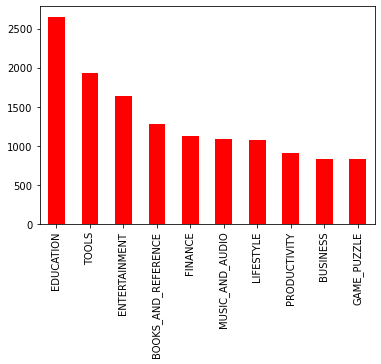

In [181]:
data.Category.value_counts()[:10].plot(kind='bar',color='r')

In [182]:
len(data.Category.unique())

51

In [183]:
data['Category'] = data['Category'].astype('category')

In [184]:
data['Category'] = data['Category'].cat.codes

In [185]:
data.columns

Index(['App Name', 'Category', 'Rating', 'Reviews', 'Installs', 'Size',
       'Price', 'Content Rating', 'Last Updated', 'Minimum Version',
       'Latest Version'],
      dtype='object')

In [186]:
len(data['Content Rating'].unique())

8

In [187]:
data['Content Rating'] = data['Content Rating'].astype('category')

In [188]:
data['Content Rating'] = data['Content Rating'].cat.codes

In [189]:
data.isnull().sum()

App Name              0
Category              0
Rating                0
Reviews               0
Installs              0
Size               2697
Price                 0
Content Rating        0
Last Updated          0
Minimum Version       0
Latest Version        0
dtype: int64

In [190]:
data.Size.fillna(method = 'ffill', inplace = True) #filling null values

In [191]:
data.dropna(inplace=True)

In [192]:
data

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
2,Peapod,44,3.656329,1967,100000.0,1400000.0,0.00,3,20-Sep-18,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,14,4.107233,389154,10000000.0,16000000.0,0.00,3,22-Mar-19,4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),14,4.647752,2291,10000.0,16000000.0,5.99,3,1-Apr-19,Varies with device,Varies with device
5,Safeway Online Shopping,14,3.825322,2559,100000.0,23000000.0,0.00,3,29-Mar-19,5.0 and up,7.6.0
6,"Yelp: Food, Shopping, Services Nearby",48,4.267268,421918,10000000.0,23000000.0,0.00,6,28-Mar-19,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
25915,KG Newsroom,39,4.500000,8,50.0,9600000.0,0.00,3,28-Mar-19,4.1 and up,1.1.15
25916,Dedi App 19,27,3.521127,71,10000.0,6500000.0,0.00,3,22-Jan-19,4.4 and up,1.0.2274
25917,Dedi App 17,27,3.994589,924,100000.0,7900000.0,0.00,3,17-Feb-17,4.0.3 and up,1.1.2043
25918,Right Angle Triangle Solver,47,4.250000,1796,100000.0,6800000.0,0.00,3,15-Dec-18,4.1 and up,2.0.5


In [193]:
#dropping the columns that are not relevant for our linear regression
data.drop(labels = ['Last Updated','Latest Version','App Name','Minimum Version'], axis = 1, inplace = True)

In [194]:
data.head()

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
2,44,3.656329,1967,100000.0,1400000.0,0.00,3
3,14,4.107233,389154,10000000.0,16000000.0,0.00,3
4,14,4.647752,2291,10000.0,16000000.0,5.99,3
5,14,3.825322,2559,100000.0,23000000.0,0.00,3
6,48,4.267268,421918,10000000.0,23000000.0,0.00,6


In [196]:
data.info() #checking if all the fields except 'Category' and 'Genres' are of either 'int64' or 'float64' type for regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25915 entries, 2 to 25919
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        25915 non-null  int8   
 1   Rating          25915 non-null  float64
 2   Reviews         25915 non-null  int64  
 3   Installs        25915 non-null  float64
 4   Size            25915 non-null  float64
 5   Price           25915 non-null  float64
 6   Content Rating  25915 non-null  int8   
dtypes: float64(4), int64(1), int8(2)
memory usage: 1.2 MB


In [204]:
data.head()

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
2,44,3.656329,1967,100000.0,1400000.0,0.00,3
3,14,4.107233,389154,10000000.0,16000000.0,0.00,3
4,14,4.647752,2291,10000.0,16000000.0,5.99,3
5,14,3.825322,2559,100000.0,23000000.0,0.00,3
6,48,4.267268,421918,10000000.0,23000000.0,0.00,6


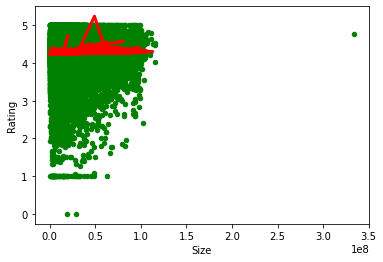

In [238]:
data.plot(x = 'Size',y='Rating',kind = 'scatter',color = 'green')
plt.plot(test['Size'], y_pred_n, color='red', linewidth = 3)


In [255]:
x_size_lin = np.linspace(train['Size'].min(),train['Size'].max(),100)

In [256]:
fun = model.intercept_ + (new_coef[3] * x_size_lin)


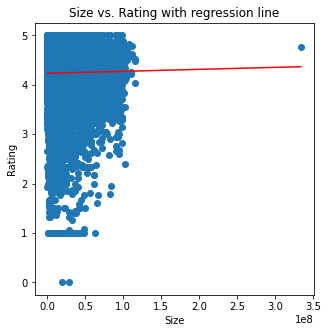

In [259]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x_size_lin, fun, 'r', label='Prediction')
ax.scatter(train['Size'], train[target], label='Training Data')
ax.set_xlabel('Size')
ax.set_ylabel('Rating')
ax.set_title('Size vs. Rating with regression line');

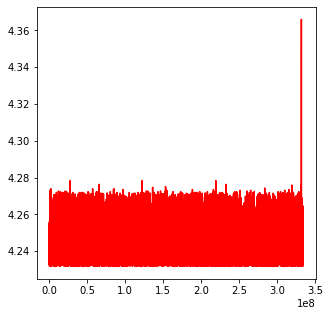

In [244]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x_size_lin, fun, 'r', label='Prediction')

In [249]:
x1 = train['Size']
y1 = train[target]

In [250]:
x1=np.expand_dims(x1, axis=1)
y1=np.expand_dims(y1, axis=1)

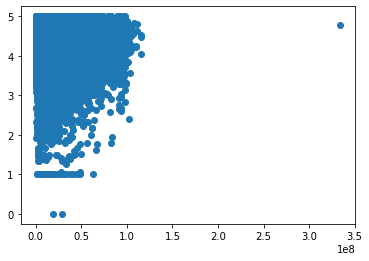

In [252]:
plt.scatter(x1, y1);

<AxesSubplot:xlabel='Price', ylabel='Rating'>

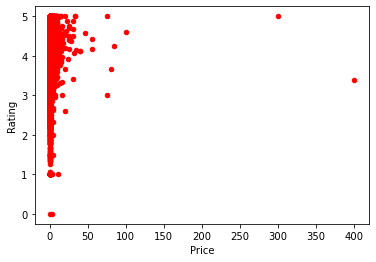

In [201]:
data.plot(x = 'Price',y='Rating',kind = 'scatter',color = 'r')

<AxesSubplot:xlabel='Installs', ylabel='Rating'>

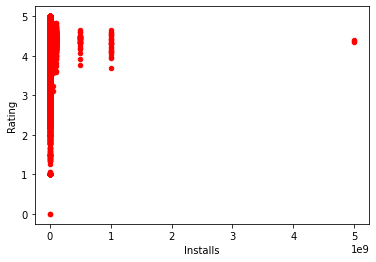

In [202]:
data.plot(x = 'Installs',y='Rating',kind = 'scatter',color = 'r')

In [205]:
#Data after Normalization 
# data = (data - data.mean())/data.std()

In [206]:
data.head()

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
2,44,3.656329,1967,100000.0,1400000.0,0.00,3
3,14,4.107233,389154,10000000.0,16000000.0,0.00,3
4,14,4.647752,2291,10000.0,16000000.0,5.99,3
5,14,3.825322,2559,100000.0,23000000.0,0.00,3
6,48,4.267268,421918,10000000.0,23000000.0,0.00,6


In [207]:
features = ['Category','Reviews','Installs','Size','Price','Content Rating']
target = ['Rating']

In [208]:
train, test = train_test_split(data,test_size=0.20)
train.head()

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
23935,42,4.652224,20818,1000000.0,37000000.0,0.0,3
6812,4,4.538168,1048,100000.0,58000000.0,0.0,3
10809,26,4.305950,4151,100000.0,58000000.0,0.0,4
5551,6,5.000000,1,100.0,24000000.0,0.0,3
7830,10,4.647173,513,10000.0,7900000.0,0.0,3


In [209]:
train.shape

(20732, 7)

In [210]:
test.shape

(5183, 7)

In [211]:
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

In [212]:
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

In [213]:
model = LinearRegression()

In [214]:
model.fit(X_train,Y_train)

LinearRegression()

In [215]:
print('Intercept: \n', model.intercept_) #value of b0

Intercept: 
 [4.2316703]


Text(0, 0.5, 'Predicted Y')

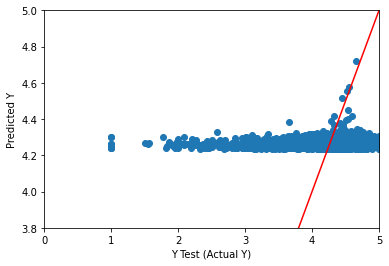

In [254]:
plt.scatter(y_test_n,y_pred_n)  

plt.ylim(3.8,5) 
plt.xlim(0,5)

x = np.linspace(0, 5, 30)
plt.plot(x, x + 0,'r', linestyle='solid')

plt.xlabel('Y Test (Actual Y)')
plt.ylabel('Predicted Y')

In [216]:
coef = model.coef_

In [217]:
coef

array([[-5.54369291e-04,  1.13562474e-08, -2.66285291e-11,
         4.02247418e-10,  1.58888488e-03,  1.04104758e-02]])

In [234]:
new_coef = np.ravel(coef)
new_coef[3]

4.0224741753726796e-10

In [235]:
x_size_lin = np.linspace(data.Size.min(),data.Size.max(),100)

In [219]:
Y_pred = model.predict(X_test) # Ratings are predicted using the regression model and saved in Y_pred
Y_pred

array([[4.25805409],
       [4.27566032],
       [4.24826304],
       ...,
       [4.25865977],
       [4.2745442 ],
       [4.28474969]])

In [220]:
Y_test.values

array([[4.19997072],
       [4.05517244],
       [4.6678896 ],
       ...,
       [4.12164784],
       [4.61592484],
       [2.27296591]])

In [221]:
coeff_df = pd.DataFrame(new_coef, ['Category','Reviews','Installs','Size','Price','Content Rating'], columns=['Coefficient'])  
coeff_df

,Coefficient
Category,-5.543693e-04
Reviews,1.135625e-08
Installs,-2.662853e-11
Size,4.022474e-10
Price,1.588885e-03
Content Rating,1.041048e-02


In [222]:
y_test_n = np.ravel(Y_test)

In [223]:
y_test_n

array([4.19997072, 4.05517244, 4.6678896 , ..., 4.12164784, 4.61592484,
       2.27296591])

In [224]:
y_pred_n = np.ravel(Y_pred)

In [225]:
df1 = pd.DataFrame.from_records({'Actual': y_test_n, 'Predicted': y_pred_n}) 
df2=df1.head(20) 

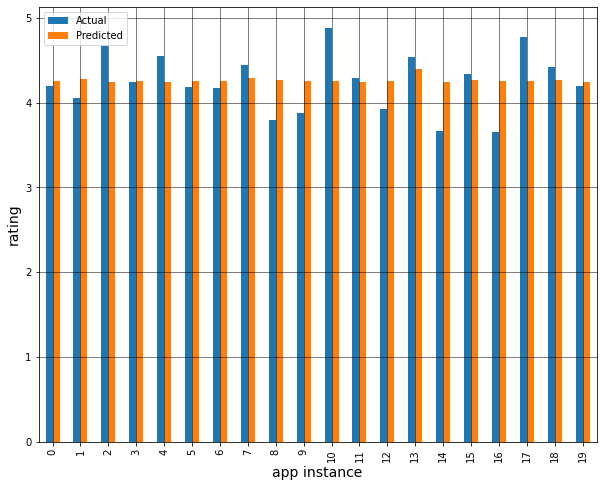

In [226]:
df2.plot(kind='bar',figsize=(10,8)) #actual vs predicted Rating values
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# plt.grid(which='minor', linestyle=':', linewidth='1', color='r')
plt.xlabel('app instance',color='black',fontsize=14)
plt.ylabel('rating',color='black',fontsize = 14)

plt.show()

In [227]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(Y_test,Y_pred)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(Y_test,Y_pred)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(Y_test,Y_pred)))

Mean Squared Error: 0.2429065183664186
Mean absolute Error: 0.348759678971473
Mean squared Log Error: 0.011657997222504424


In [228]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_reg_2.fit_transform(X_train)

In [229]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y_train)

LinearRegression()

In [230]:
X_poly_2_test = poly_reg_2.fit_transform(X_test)

In [231]:
y_prdipol = lin_reg_2.predict(X_poly_2_test)

In [232]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(Y_test,y_prdipol)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(Y_test,y_prdipol)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(Y_test,y_prdipol)))

Mean Squared Error: 0.24172619245407193
Mean absolute Error: 0.3477585363887495
Mean squared Log Error: 0.011608075241607995


[(10, -0.012946161153899904),
 (20, 0.04936195668130794),
 (30, 0.05139889447839174),
 (40, 0.07556417996133491),
 (50, 0.06551957994318591),
 (60, 0.06548598191327382),
 (70, 0.07534433591750334),
 (80, 0.07372508318118165),
 (90, 0.07341282726907417),
 (100, 0.07362705782594703),
 (110, 0.0795426625446275),
 (120, 0.07411306973842635),
 (130, 0.07591595011754393),
 (140, 0.07786790459536408),
 (150, 0.08030465162005007),
 (160, 0.0751377810800582),
 (170, 0.07724992108894213),
 (180, 0.0780921489392239),
 (190, 0.0863651961111831)]

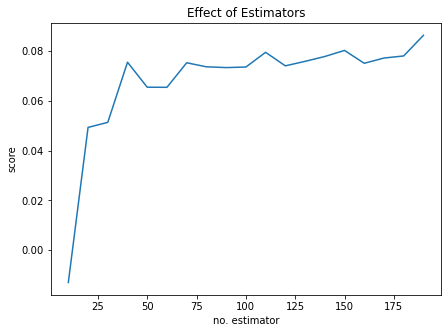

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [97]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.23522683533060262)